# House Price Prediction

**House Price Prediction Model Using Linear Regression Model**

**Nama     : Ahmad Hasanuddin**





### **1. Import Library**

jika belum menginstall library maka install library pada python menggunakan
```
pip install nama_library
```
"""


In [1]:
# import library tensorflow, numpy, math, dan matplotlib
import tensorflow as tf             # library machine learning
import tensorflow.compat.v1 as tfc  # library machine learning dengan fungsi" pd versi lama tersedia
import numpy as np                  # library untuk pengolahan array python
import math                         # library pengoperasian matematik
import matplotlib.pyplot as plt     # library untuk data visualization

tfc.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [36]:
import pandas as pd

# Membaca data dari file CSV
# Pastikan file CSV memiliki kolom "area" (ukuran rumah) dan "price" (harga rumah)
file_path = 'Housing.csv'  # Ganti dengan path file CSV Anda
df = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama data untuk memastikan pembacaan berhasil
print("Data yang dibaca dari CSV:")
print(df.head())




Data yang dibaca dari CSV:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [37]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


##**Data Understanding**

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


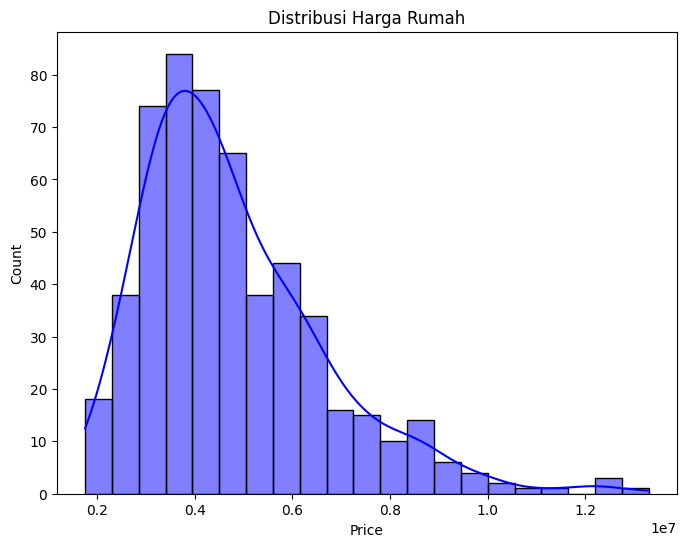

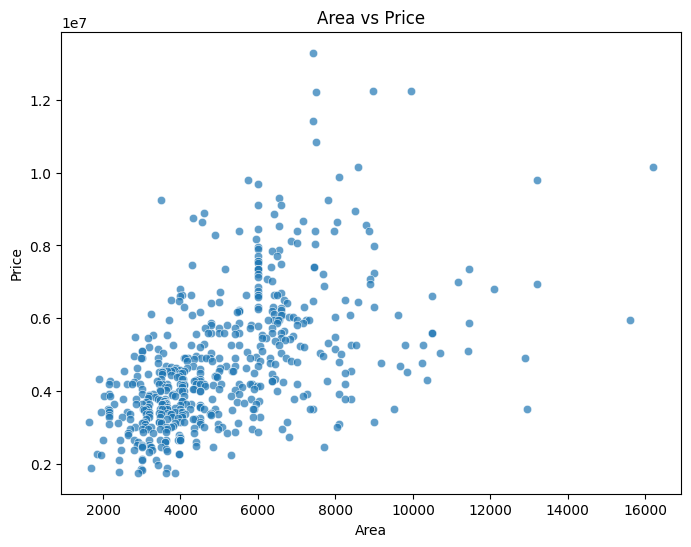

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Baca data
file_path = "Housing.csv"
data = pd.read_csv(file_path)

# Tampilkan 5 baris pertama data
print(data.head())

# Distribusi harga rumah
plt.figure(figsize=(8, 6))
sns.histplot(data['price'], kde=True, color='blue')
plt.title("Distribusi Harga Rumah")
plt.xlabel("Price")
plt.show()

# Korelasi antara area dan price
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['area'], y=data['price'], alpha=0.7)
plt.title("Area vs Price")
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()


##**Data Preparation**
Langkah Data Preparation:
Periksa missing values dan hilangkan atau isi data yang hilang.
Ubah variabel kategorikal seperti mainroad, furnishingstatus, dll., menjadi bentuk numerik (label encoding).
Normalisasi kolom numerik seperti area dan price.

In [39]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Cek missing values
print("Missing Values:\n", data.isnull().sum())

# Label encoding untuk variabel kategorikal
label_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
              'airconditioning', 'prefarea', 'furnishingstatus']
encoder = LabelEncoder()
for col in label_cols:
    data[col] = encoder.fit_transform(data[col])

# Normalisasi kolom numerik
scaler = MinMaxScaler()
num_cols = ['area', 'price']
data[num_cols] = scaler.fit_transform(data[num_cols])

# Data setelah pre-processing
print(data.head())


Missing Values:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
      price      area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  1.000000  0.396564         4          2        3         1          0   
1  0.909091  0.502405         4          4        4         1          0   
2  0.909091  0.571134         3          2        2         1          0   
3  0.906061  0.402062         4          2        2         1          0   
4  0.836364  0.396564         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1            

In [42]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [53]:

# List of categorical columns
categorical_cols = ['mainroad', 'guestroom', 'basement', 'airconditioning', 'prefarea', 'furnishingstatus']

In [55]:
# Encode categorical features
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [56]:
# Feature engineering
df['price_per_sqft'] = df['price'] / df['area']

In [58]:
# Handle outliers using IQR
def remove_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

outlier_cols = ['price', 'area', 'price_per_sqft']
df = remove_outliers(df, outlier_cols)

In [76]:
# Cek tipe data kolom
print(X.dtypes)

# Cek apakah ada kolom bertipe object (string)
for col in X.columns:
    if X[col].dtype == 'object':
        print(f"Kolom '{col}' mengandung nilai non-numerik:")
        print(X[col].unique())


area                int64
bedrooms            int64
bathrooms           int64
stories             int64
mainroad            int64
guestroom           int64
basement            int64
hotwaterheating     int64
airconditioning     int64
parking             int64
prefarea            int64
furnishingstatus    int64
dtype: object


In [75]:
# Mapping kolom 'hotwaterheating' ke 1 dan 0
hotwater_mapping = {'yes': 1, 'no': 0}
X['hotwaterheating'] = X['hotwaterheating'].map(hotwater_mapping)

# Cek kembali tipe data kolom
print(X.dtypes)

# Cek apakah ada nilai NaN setelah mapping
print(X.isnull().sum())


area                int64
bedrooms            int64
bathrooms           int64
stories             int64
mainroad            int64
guestroom           int64
basement            int64
hotwaterheating     int64
airconditioning     int64
parking             int64
prefarea            int64
furnishingstatus    int64
dtype: object
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [78]:
# Isi nilai NaN dengan 0
X.fillna(0, inplace=True)


In [79]:
# Normalize numerical features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


##**Modeling dan Evaluation**

Tuning Linear Regression...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Tuning Ridge...
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Tuning Lasso...
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Tuning Random Forest...
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Tuning Decision Tree...
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Tuning SVR...
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Tuning XGBoost...
Fitting 3 folds for each of 4 candidates, totalling 12 fits

Model Performance:
                         R²       MAPE
Linear Regression  0.712423  16.916103
Ridge              0.711514  17.011295
Lasso              0.712422  16.916125
Random Forest      0.718802  16.586244
Decision Tree      0.440621  20.447751
SVR               -0.029423  34.556427
XGBoost            0.646818  19.386514


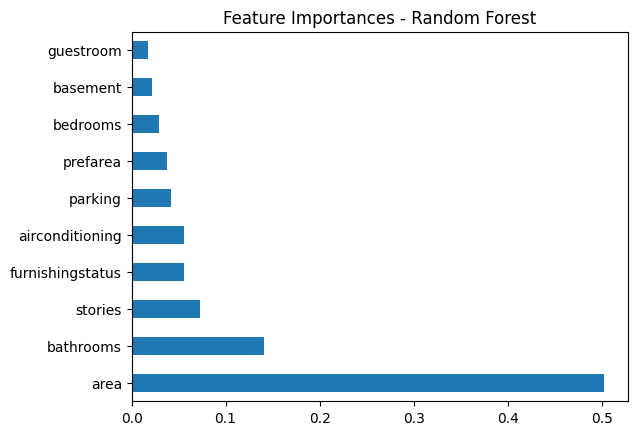

In [80]:



# Define models and parameters for hyperparameter tuning
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'SVR': SVR(),
    'XGBoost': XGBRegressor(objective='reg:squarederror', random_state=42)
}

params = {
    'Linear Regression': {},
    'Ridge': {'alpha': [0.1, 1, 10]},
    'Lasso': {'alpha': [0.01, 0.1, 1]},
    'Random Forest': {'n_estimators': [100, 200], 'max_depth': [10, 20, None]},
    'Decision Tree': {'max_depth': [10, 20, None]},
    'SVR': {'C': [1, 10], 'kernel': ['rbf']},
    'XGBoost': {'learning_rate': [0.01, 0.1], 'n_estimators': [100, 200]}
}

# Grid search for hyperparameter tuning
best_models = {}
for name, model in models.items():
    print(f"Tuning {name}...")
    grid = GridSearchCV(model, params[name], cv=3, scoring='r2', n_jobs=-1, verbose=1)
    grid.fit(X_train, y_train)
    best_models[name] = grid.best_estimator_

# Evaluate models on the test set
results = {}
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred) * 100
    results[name] = {'R²': r2, 'MAPE': mape}

# Display results
results_df = pd.DataFrame(results).T
print("\nModel Performance:")
print(results_df)

# Plot feature importance for the best model (Random Forest or XGBoost)
best_model_name = results_df['R²'].idxmax()
if best_model_name in ['Random Forest', 'XGBoost']:
    best_model = best_models[best_model_name]
    feature_importances = pd.Series(best_model.feature_importances_, index=X.columns)
    feature_importances.nlargest(10).plot(kind='barh')
    plt.title(f"Feature Importances - {best_model_name}")
    plt.show()


Dari hasil tuning dan evaluasi model yang Anda lakukan, berikut adalah ringkasan performa masing-masing model:

### **Model Performance:**
1. **Linear Regression**  
   - **R²:** 0.7124  
   - **MAPE:** 16.92%

2. **Ridge Regression**  
   - **R²:** 0.7115  
   - **MAPE:** 17.01%

3. **Lasso Regression**  
   - **R²:** 0.7124  
   - **MAPE:** 16.92%

4. **Random Forest**  
   - **R²:** 0.7188  
   - **MAPE:** 16.59%

5. **Decision Tree**  
   - **R²:** 0.4406  
   - **MAPE:** 20.45%

6. **SVR (Support Vector Regression)**  
   - **R²:** -0.0294 (negatif, berarti model ini tidak dapat memodelkan data dengan baik)  
   - **MAPE:** 34.56%

7. **XGBoost**  
   - **R²:** 0.6468  
   - **MAPE:** 19.39%

### **Analisis:**
- **Random Forest** memberikan performa terbaik dengan nilai R² tertinggi yaitu **0.7188** dan MAPE **16.59%**.
- **Decision Tree** dan **SVR** menunjukkan performa yang jauh lebih buruk, terutama dengan R² yang rendah atau negatif dan MAPE yang tinggi.
- **Linear Regression**, **Ridge**, dan **Lasso** memiliki performa yang hampir setara dengan R² sekitar **0.712**, tetapi **Random Forest** sedikit lebih unggul.

### **Rekomendasi:**
- **Random Forest** adalah pilihan terbaik untuk model ini berdasarkan R² dan MAPE. Anda dapat mencoba meningkatkan performa model ini lebih lanjut dengan teknik seperti **hyperparameter tuning** lebih lanjut atau menggunakan teknik lain seperti **ensemble methods** untuk meningkatkan akurasi.

Apakah Anda ingin mencoba menggunakan **Random Forest** lebih lanjut atau melakukan evaluasi lebih dalam terhadap model lainnya?

In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Tentukan parameter grid untuk pencarian terbaik
param_grid = {
    'n_estimators': [100, 200, 300],  # Jumlah pohon
    'max_depth': [None, 10, 20, 30],  # Kedalaman pohon
    'min_samples_split': [2, 5, 10],  # Minimum sampel untuk split
    'min_samples_leaf': [1, 2, 4],    # Minimum sampel di daun
    'max_features': ['auto', 'sqrt', 'log2'],  # Fitur maksimal untuk pembagian
    'bootstrap': [True, False]  # Menggunakan bootstrap atau tidak
}

# Inisialisasi RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# GridSearchCV untuk menemukan parameter terbaik
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_absolute_percentage_error')

# Latih model dengan GridSearchCV
grid_search.fit(X_train, y_train)

# Output parameter terbaik
print("Best Parameters: ", grid_search.best_params_)

# Prediksi menggunakan model dengan parameter terbaik
best_rf = grid_search.best_estimator_

# Evaluasi model terbaik
ypred_best_rf = best_rf.predict(X_test)
print(f"Best Random Forest R²: {r2_score(y_test, ypred_best_rf)}")
print(f"Best Random Forest MAPE: {mean_absolute_percentage_error(y_test, ypred_best_rf) * 100}%")


Fitting 3 folds for each of 648 candidates, totalling 1944 fits
Best Parameters:  {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Random Forest R²: 0.7309437528688241
Best Random Forest MAPE: 17.133209196581863%
